##  Back Order Data

1. Module and Environment set up
2. Data import and understanding
3. Missing value treatment
4. Feature transformation
5. Feature selection
6. ML modelling and validation with different algorithms and parameters

In [0]:
# Import Libraries required for the experiment
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import QuantileTransformer,MinMaxScaler,RobustScaler,StandardScaler
import random
import os
import seaborn as sns
from sklearn import datasets
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.metrics import roc_auc_score,roc_curve,confusion_matrix,accuracy_score,classification_report
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from IPython.display import Image  
from sklearn import tree
import collections
np.random.seed(132)

In [0]:
import warnings
warnings.filterwarnings('ignore')

# Prints all line without skipping
pd.set_option('display.max_rows', None)
# Prints all columns without skipping
pd.set_option('display.max_columns', None)

# Load dataset <a class="anchor" id="6"></a>

In [0]:
sparkDF = spark.read.csv("/FileStore/tables/Training_Dataset_v2.csv", header="true", inferSchema="true")
backorder = sparkDF.toPandas()

In [0]:
sparkDF = spark.read.csv("/FileStore/tables/Test_Dataset_v2.csv", header="true", inferSchema="true")
backorder_test = sparkDF.toPandas()


# Data Understanding <a class="anchor" id="6"></a>

In [0]:
backorder.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1687861 entries, 0 to 1687860
Data columns (total 23 columns):
 # Column Non-Null Count Dtype 
--- ------ -------------- ----- 
 0 sku 1687861 non-null object 
 1 national_inv 1687860 non-null float64
 2 lead_time 1586967 non-null float64
 3 in_transit_qty 1687860 non-null float64
 4 forecast_3_month 1687860 non-null float64
 5 forecast_6_month 1687860 non-null float64
 6 forecast_9_month 1687860 non-null float64
 7 sales_1_month 1687860 non-null float64
 8 sales_3_month 1687860 non-null float64
 9 sales_6_month 1687860 non-null float64
 10 sales_9_month 1687860 non-null float64
 11 min_bank 1687860 non-null float64
 12 potential_issue 1687860 non-null object 
 13 pieces_past_due 1687860 non-null float64
 14 perf_6_month_avg 1687860 non-null float64
 15 perf_12_month_avg 1687860 non-null float64
 16 local_bo_qty 1687860 non-null float64
 17 deck_risk 1687860 non-null object 
 18 oe_constraint 1687860 non-null object 
 19 ppap_risk 1687860 non-null object 
 20 stop_auto_buy 1687860 non-null object 
 21 rev_stop 1687860 non-null object 
 22 went_on_backorder 1687860 non-null object 
dtypes: float64(15), object(8)
memory usage: 296.2+ MB

In [0]:
backorder.describe(include='all')

Out[6]:

,sku,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,min_bank,potential_issue,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
count,1687861,1.687860e+06,1.586967e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06,1687860,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06,1687860,1687860,1687860,1687860,1687860,1687860
unique,1687861,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,2,2,2,2,2,2
top,2235734,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,No,No,No,Yes,No,No
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1686953,NaN,NaN,NaN,NaN,1300377,1687615,1484026,1626774,1687129,1676567
mean,NaN,4.961118e+02,7.872267e+00,4.405202e+01,1.781193e+02,3.449867e+02,5.063644e+02,5.592607e+01,1.750259e+02,3.417288e+02,5.252697e+02,5.277230e+01,NaN,2.043724e+00,-6.872059e+00,-6.437947e+00,6.264507e-01,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,2.961523e+04,7.056024e+00,1.342742e+03,5.026553e+03,9.795152e+03,1.437892e+04,1.928196e+03,5.192378e+03,9.613167e+03,1.483861e+04,1.254983e+03,NaN,2.360165e+02,2.655636e+01,2.584333e+01,3.372224e+01,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,-2.725600e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NaN,0.000000e+00,-9.900000e+01,-9.900000e+01,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,4.000000e+00,4.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NaN,0.000000e+00,6.300000e-01,6.600000e-01,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,1.500000e+01,8.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,2.000000e+00,4.000000e+00,0.000000e+00,NaN,0.000000e+00,8.200000e-01,8.100000e-01,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,8.000000e+01,9.000000e+00,0.000000e+00,4.000000e+00,1.200000e+01,2.000000e+01,4.000000e+00,1.500000e+01,3.100000e+01,4.700000e+01,3.000000e+00,NaN,0.000000e+00,9.700000e-01,9.500000e-01,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN


in_transit_qty is very skewed <br>
potential_issue is very skewewd <br>
perf_6_month_avg,perf_12_month_avg shows -99 when lead time is NaN <br>
local_bo_qty is very skewed <br>
pieces_past_due is very skewed <br>
oe_constraint , rev_stop is very skewed <br>
went_on_backorder is very skewed

In [0]:
backorder.nunique()

Out[7]: sku 1687861
national_inv 14969
lead_time 32
in_transit_qty 5230
forecast_3_month 7825
forecast_6_month 11114
forecast_9_month 13662
sales_1_month 5764
sales_3_month 10495
sales_6_month 14818
sales_9_month 18341
min_bank 5568
potential_issue 2
pieces_past_due 826
perf_6_month_avg 102
perf_12_month_avg 102
local_bo_qty 654
deck_risk 2
oe_constraint 2
ppap_risk 2
stop_auto_buy 2
rev_stop 2
went_on_backorder 2
dtype: int64

In [0]:
temp = backorder.copy()

In [0]:
('total positive class in %',(temp[temp['went_on_backorder']=='Yes'].shape[0]/len(temp))*100)

Out[9]: ('total positive class in %', 0.6690716830355106)

national_inv
lead_time
in_transit_qty
forecast_3_month
forecast_6_month
forecast_9_month
sales_1_month
sales_3_month
sales_6_month
sales_9_month
min_bank
pieces_past_due
perf_6_month_avg
perf_12_month_avg
local_bo_qty

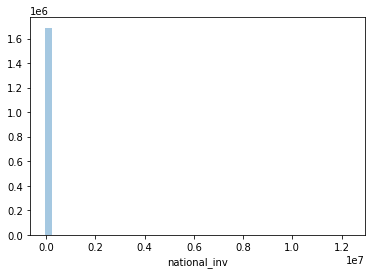

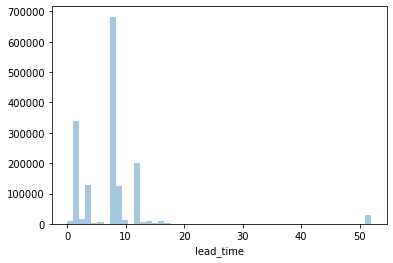

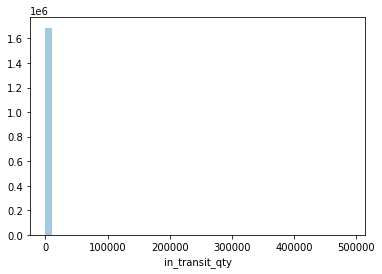

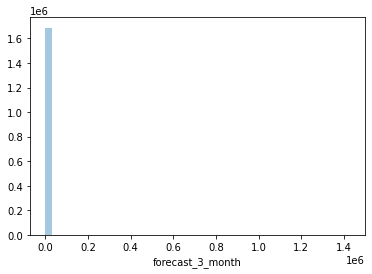

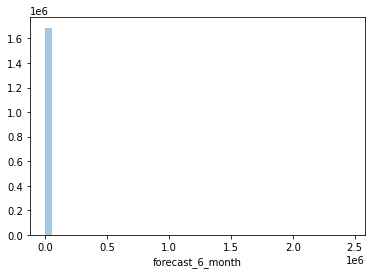

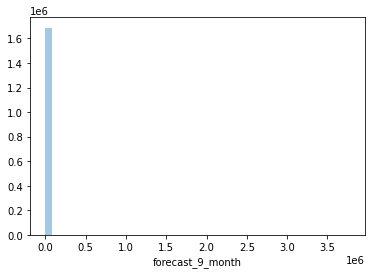

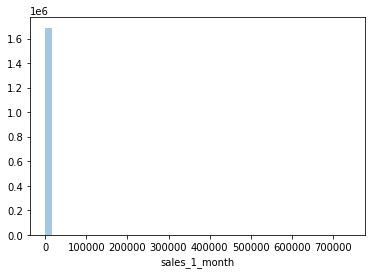

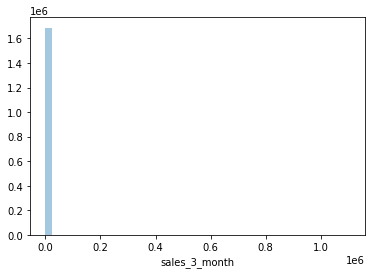

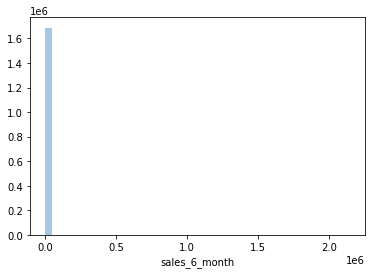

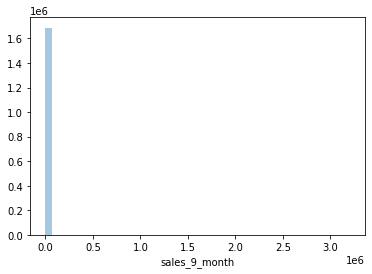

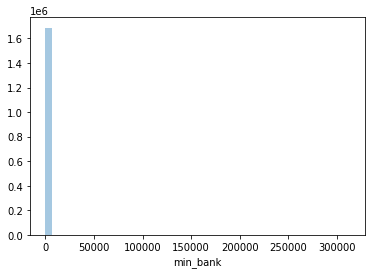

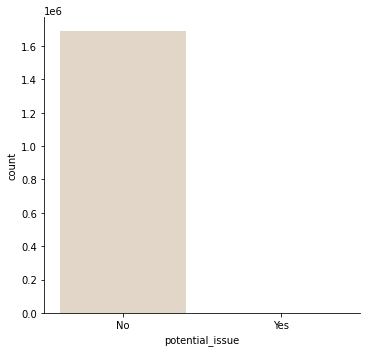

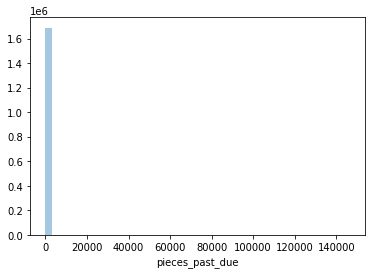

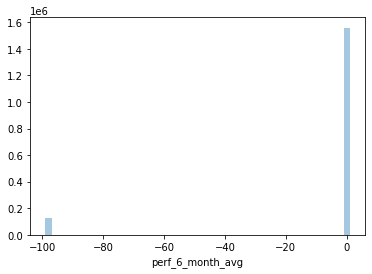

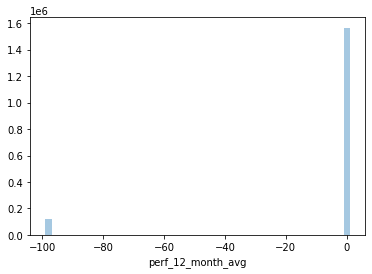

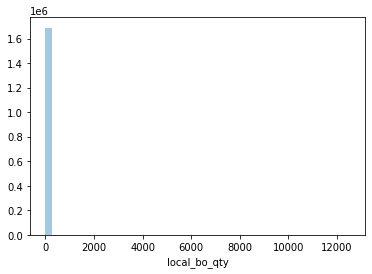

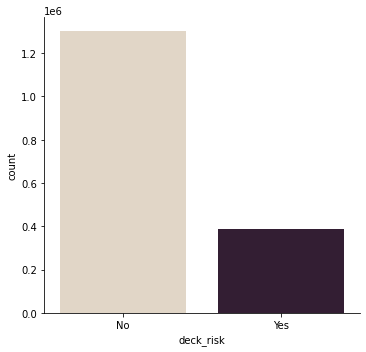

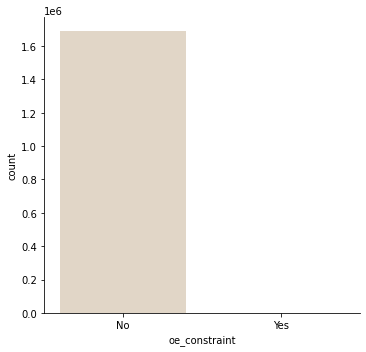

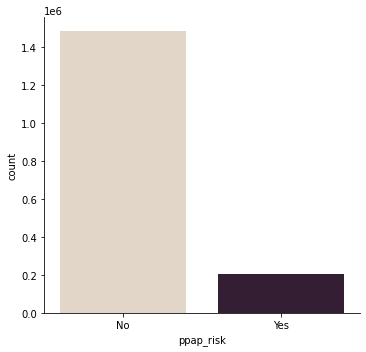

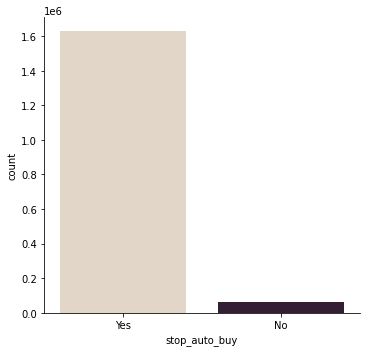

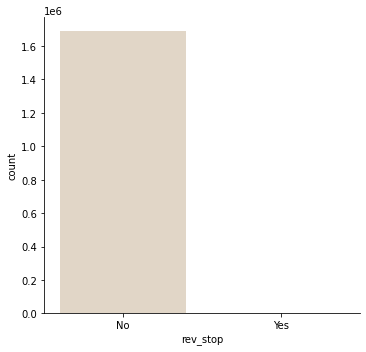

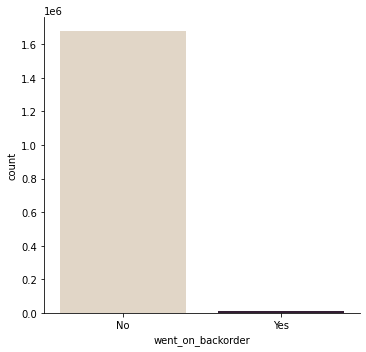

In [0]:

for i in range(1,len(temp.columns)):
    if(temp.dtypes[i] in ('float64','int64')):
        print(temp.columns[i])
        plt.figure()
        sns_plot = sns.distplot(temp[temp.columns[i]], kde=False)
    else:
        plt.figure()
        sns_plot = sns.catplot(x=temp.columns[i], kind="count", palette="ch:.25", data=temp)


#### Bivariate Analysis

In [0]:
# cross tab for categorical data wrt target variable

In [0]:
print(pd.crosstab(temp.went_on_backorder, temp.rev_stop), 'Training data')

pd.crosstab(backorder_test.went_on_backorder, backorder_test.rev_stop)



rev_stop No Yes
went_on_backorder 
No 1675836 731
Yes 11293 0 Training data
Out[12]:

rev_stop,No,Yes
went_on_backorder,,
No,239283,104
Yes,2684,4


In [0]:
pd.crosstab(temp.went_on_backorder, temp.stop_auto_buy)

Out[13]:

stop_auto_buy,No,Yes
went_on_backorder,,
No,60615,1615952
Yes,471,10822


In [0]:
pd.crosstab(temp.went_on_backorder, temp.ppap_risk)

Out[14]:

ppap_risk,No,Yes
went_on_backorder,,
No,1474492,202075
Yes,9534,1759


In [0]:
pd.crosstab(temp.went_on_backorder, temp.oe_constraint)

Out[15]:

oe_constraint,No,Yes
went_on_backorder,,
No,1676330,237
Yes,11285,8


In [0]:
pd.crosstab(temp.went_on_backorder, temp.deck_risk)

Out[16]:

deck_risk,No,Yes
went_on_backorder,,
No,1291000,385567
Yes,9377,1916


In [0]:
pd.crosstab(temp.went_on_backorder, temp.potential_issue)

Out[17]:

potential_issue,No,Yes
went_on_backorder,,
No,1675711,856
Yes,11242,51


In [0]:
# Box Plot Numerical data

In [0]:
num_data_train_columns = backorder[backorder.columns[backorder.dtypes!='object']].columns


national_inv
lead_time
in_transit_qty
forecast_3_month
forecast_6_month
forecast_9_month
sales_1_month
sales_3_month
sales_6_month
sales_9_month
min_bank
pieces_past_due
perf_6_month_avg
perf_12_month_avg
local_bo_qty

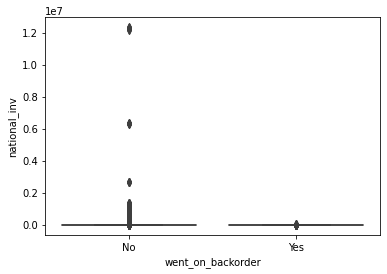

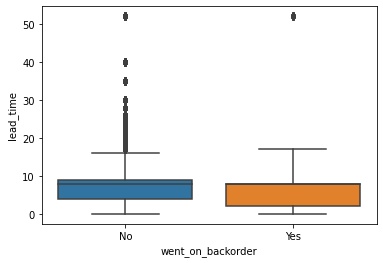

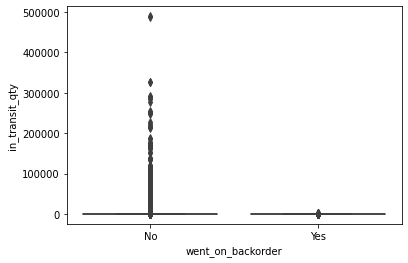

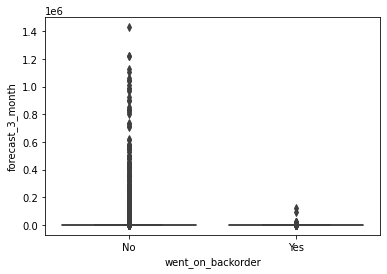

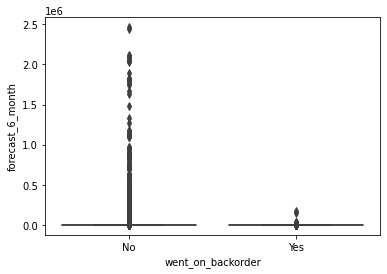

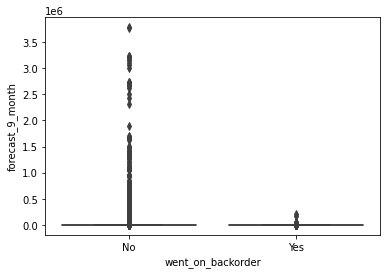

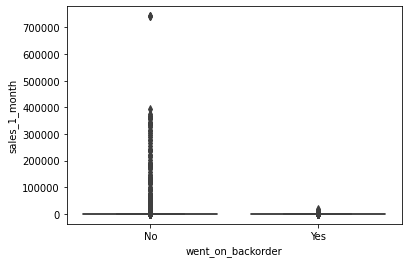

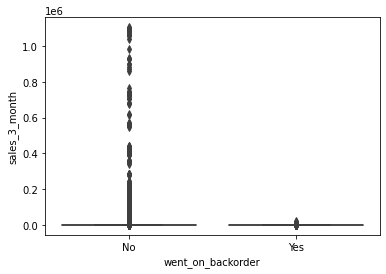

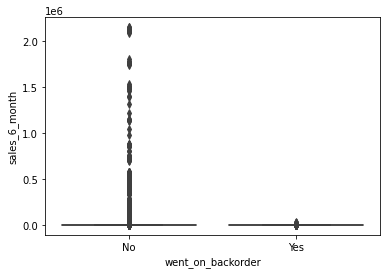

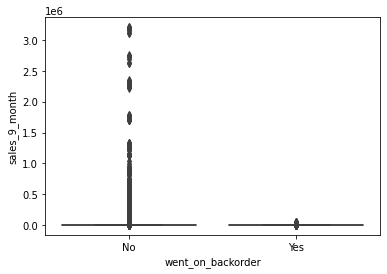

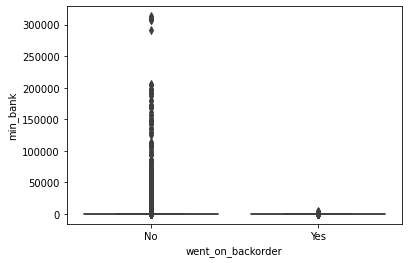

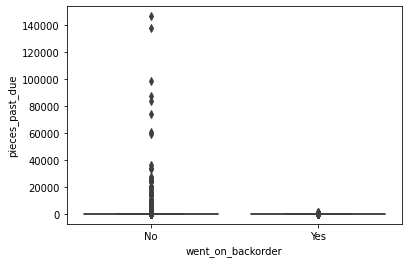

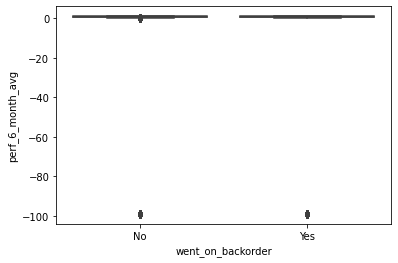

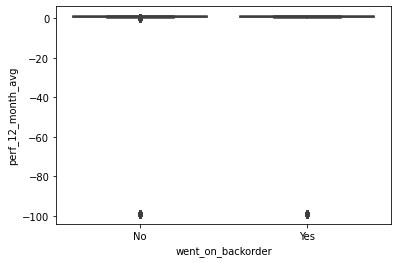

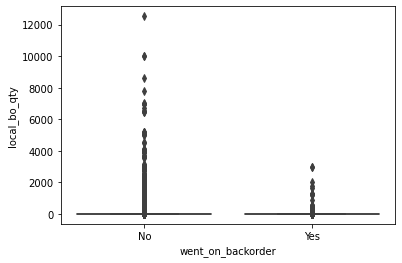

In [0]:
import warnings
warnings.filterwarnings('ignore')
for col in num_data_train_columns:
    print(col)
    plt.figure()
    sns.boxplot(temp.went_on_backorder, temp[col])

In [0]:
temp['perf_6_month_avg'][temp['lead_time'].isnull()].value_counts()

Out[21]: -99.0 100893
Name: perf_6_month_avg, dtype: int64

In [0]:
temp['perf_12_month_avg'][temp['lead_time'].isnull()].value_counts()

Out[22]: -99.0 100893
Name: perf_12_month_avg, dtype: int64

In [0]:
temp[['perf_6_month_avg','lead_time']][temp['lead_time'].notnull()].corr()

Out[23]:

,perf_6_month_avg,lead_time
perf_6_month_avg,1.00000,-0.09994
lead_time,-0.09994,1.00000


In [0]:
temp[['perf_12_month_avg','lead_time']][temp['lead_time'].notnull()].corr()

Out[24]:

,perf_12_month_avg,lead_time
perf_12_month_avg,1.000000,-0.106019
lead_time,-0.106019,1.000000


In [0]:
temp[['perf_12_month_avg','perf_6_month_avg']][temp['lead_time'].notnull()].corr()

Out[25]:

,perf_12_month_avg,perf_6_month_avg
perf_12_month_avg,1.000000,0.859407
perf_6_month_avg,0.859407,1.000000


In [0]:
324/temp['went_on_backorder'][temp['lead_time'].isnull()].shape[0]

Out[26]: 0.0032112910579419987

In [0]:
temp['perf_6_month_avg'].mean()

Out[27]: -6.8720588378183045

In [0]:
perf_6_month_avg_mean = temp['perf_6_month_avg'][temp['perf_6_month_avg']!=-99.0].mean()
perf_12_month_avg_mean = temp['perf_12_month_avg'][temp['perf_6_month_avg']!=-99.0].mean()

In [0]:
perf_6_month_avg_mean

Out[29]: 0.7823811940846338

###### Missing Value Treatment

In [0]:
temp['perf_6_month_avg'] = np.where(temp['perf_6_month_avg']==-99.0,perf_6_month_avg_mean,temp['perf_6_month_avg'] )
temp['perf_12_month_avg'] = np.where(temp['perf_12_month_avg']==-99.0,perf_12_month_avg_mean,temp['perf_12_month_avg'] )
temp['perf_6_month_avg'].mean()

Out[30]: 0.7823811940846339

In [0]:
# there is one record which is null for every columns

In [0]:
temp= temp.dropna( axis=0, 
                    thresh=22)

In [0]:
# Retrieve Columns that have Null Value 
null_columns=temp.columns[temp.isnull().any()]
null_columns

Out[33]: Index(['lead_time'], dtype='object')

In [0]:
temp['lead_time'] = np.where(temp['lead_time'].isnull(),temp['lead_time'].mean(),temp['lead_time'])

In [0]:
# Retrieve Columns that have Null Value 
null_columns=temp.columns[temp.isnull().any()]
null_columns

Out[35]: Index([], dtype='object')

In [0]:
num_data_train_columns = backorder[backorder.columns[backorder.dtypes!='object']].columns


##### outlier treatment

In [0]:
def outlier(col):
    q_low = temp[col].quantile(0.01)
    q_hi  = temp[col].quantile(0.99)
    median = temp[col].median()
    print(col)
    print((temp[col]>q_hi).sum())
    return np.where((temp[col]>q_hi),median,temp[col])

In [0]:
for col in num_data_train_columns:
    temp[col] = outlier(col)

national_inv
16873
lead_time
0
in_transit_qty
16874
forecast_3_month
16877
forecast_6_month
16876
forecast_9_month
16877
sales_1_month
16875
sales_3_month
16874
sales_6_month
16878
sales_9_month
16876
min_bank
16870
pieces_past_due
16674
perf_6_month_avg
0
perf_12_month_avg
0
local_bo_qty
16191

national_inv
lead_time
in_transit_qty
forecast_3_month
forecast_6_month
forecast_9_month
sales_1_month
sales_3_month
sales_6_month
sales_9_month
min_bank
pieces_past_due
perf_6_month_avg
perf_12_month_avg
local_bo_qty

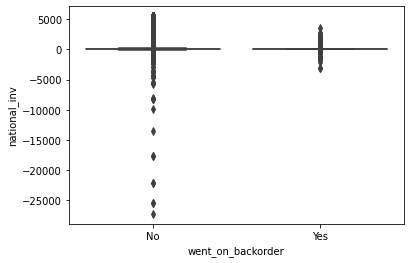

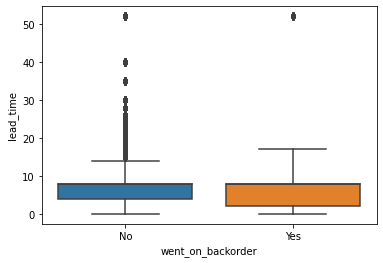

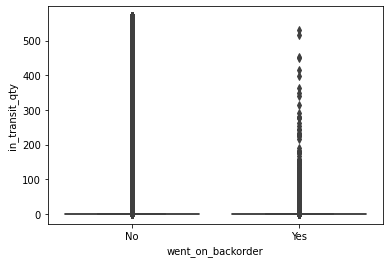

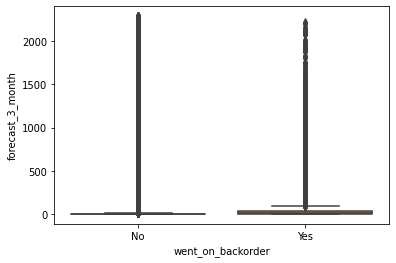

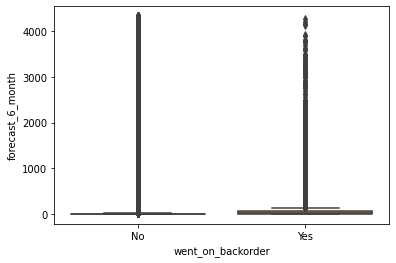

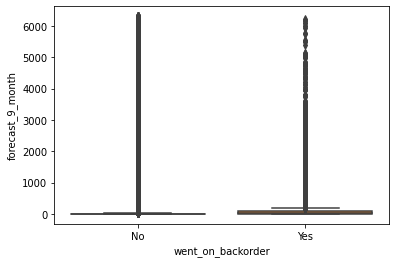

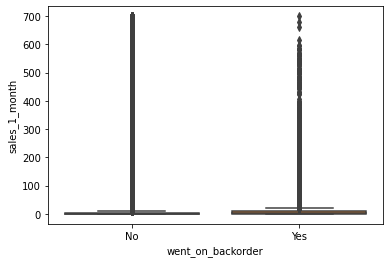

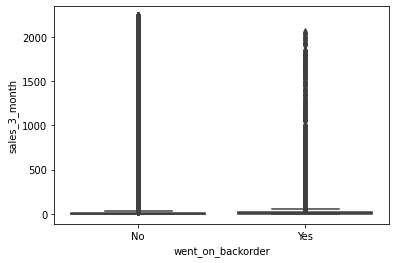

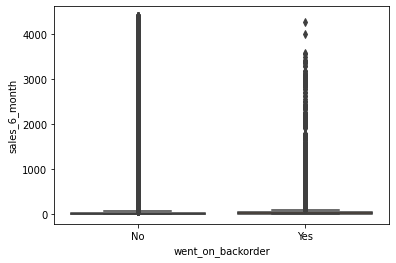

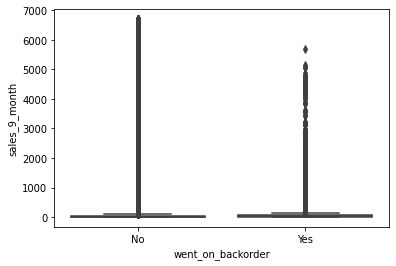

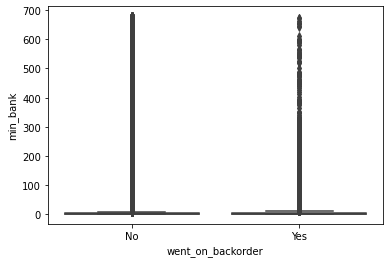

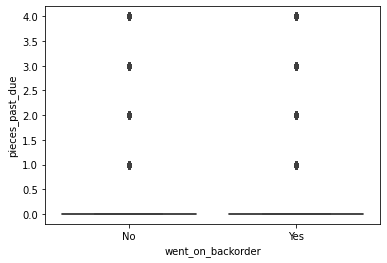

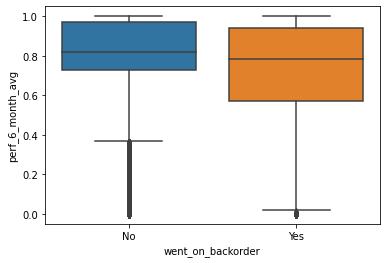

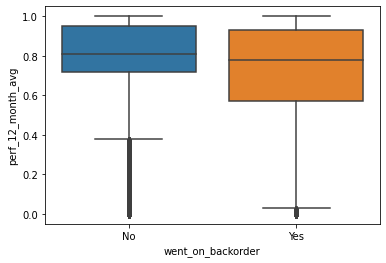

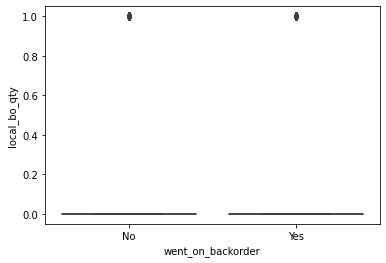

In [0]:
import warnings
warnings.filterwarnings('ignore')
for col in num_data_train_columns:
    print(col)
    plt.figure()
    sns.boxplot(temp.went_on_backorder, temp[col])

In [0]:
temp.went_on_backorder.value_counts()/len(temp)

Out[41]: No 0.993309
Yes 0.006691
Name: went_on_backorder, dtype: float64

In [0]:
y_train = np.where(temp['went_on_backorder']=='Yes',1,0)
x_train = temp.drop(['went_on_backorder','sku'],axis=1)

In [0]:
pd.DataFrame(y_train).value_counts()/len(y_train)

Out[52]: 0 0.993309
1 0.006691
dtype: float64

In [0]:
from imblearn.over_sampling import SMOTENC
smote_nc = SMOTENC(categorical_features=[11,16,17,18,19,20], random_state=0)
X_train2, y_train2 = smote_nc.fit_resample(x_train, y_train)

In [0]:
pd.DataFrame(y_train2).value_counts()/len(y_train2)

Out[53]: 1 0.5
0 0.5
dtype: float64

In [0]:
from imblearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

In [0]:
numeric_features = ['national_inv', 'lead_time', 'in_transit_qty', 'forecast_3_month',       'forecast_6_month', 'forecast_9_month', 'sales_1_month',       'sales_3_month', 'sales_6_month', 'sales_9_month', 'min_bank',       'pieces_past_due', 'perf_6_month_avg', 'perf_12_month_avg',       'local_bo_qty']
numeric_transformer = Pipeline(steps=[    ('scaler', StandardScaler())])

categorical_features = ['potential_issue', 'deck_risk', 'oe_constraint', 'ppap_risk','stop_auto_buy', 'rev_stop']
categorical_transformer = Pipeline(steps=[
    ('encoder', OneHotEncoder(handle_unknown='ignore'))])


preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Append classifier to preprocessing pipeline.
# Now we have a full prediction pipeline.
clf = make_pipeline(preprocessor,DecisionTreeClassifier())
clf.fit(X_train2, y_train2)


Out[66]: Pipeline(steps=[('columntransformer',
 ColumnTransformer(transformers=[('num',
 Pipeline(steps=[('scaler',
 StandardScaler())]),
 ['national_inv', 'lead_time',
 'in_transit_qty',
 'forecast_3_month',
 'forecast_6_month',
 'forecast_9_month',
 'sales_1_month',
 'sales_3_month',
 'sales_6_month',
 'sales_9_month', 'min_bank',
 'pieces_past_due',
 'perf_6_month_avg',
 'perf_12_month_avg',
 'local_bo_qty']),
 ('cat',
 Pipeline(steps=[('encoder',
 OneHotEncoder(handle_unknown='ignore'))]),
 ['potential_issue',
 'deck_risk', 'oe_constraint',
 'ppap_risk', 'stop_auto_buy',
 'rev_stop'])])),
 ('decisiontreeclassifier', DecisionTreeClassifier())])

In [0]:
backorder_test = backorder_test.dropna()
y_test = np.where(backorder_test['went_on_backorder']=='Yes',1,0)
x_test = backorder_test.drop(['went_on_backorder','sku'],axis=1)
y_pred_test = clf.predict(x_test)
#Test accuracy
print('accuracy',accuracy_score(y_test, y_pred_test))
print('precision',metrics.precision_score(y_test, y_pred_test))
#Recall
print('recall',metrics.recall_score(y_test, y_pred_test))
  


accuracy 0.9833473351777647
precision 0.17950108459869848
recall 0.1271121351766513

### Modelling and logging

In [0]:
import mlflow

In [0]:
#Necessary imports for mlflow
import mlflow
import mlflow.pyfunc
import mlflow.sklearn
from mlflow.models.signature import infer_signature
from mlflow.utils.environment import _mlflow_conda_env
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve


##### Decision Tree

In [0]:
with mlflow.start_run(run_name = 'Backorder_AG_DT_AG'):
  numeric_features = ['national_inv', 'lead_time', 'in_transit_qty', 'forecast_3_month',       'forecast_6_month', 'forecast_9_month', 'sales_1_month',       'sales_3_month', 'sales_6_month', 'sales_9_month', 'min_bank',       'pieces_past_due', 'perf_6_month_avg', 'perf_12_month_avg',       'local_bo_qty']
  numeric_transformer = Pipeline(steps=[    ('scaler', StandardScaler())])

  categorical_features = ['potential_issue', 'deck_risk', 'oe_constraint', 'ppap_risk','stop_auto_buy', 'rev_stop']
  categorical_transformer = Pipeline(steps=[
      ('encoder', OneHotEncoder(handle_unknown='ignore'))])


  preprocessor = ColumnTransformer(
      transformers=[
          ('num', numeric_transformer, numeric_features),
          ('cat', categorical_transformer, categorical_features)])

  # Append classifier to preprocessing pipeline.
  # Now we have a full prediction pipeline.
  clf = make_pipeline(preprocessor,DecisionTreeClassifier())
  clf.fit(X_train2, y_train2)
#  best_random_dt = dt_random.best_estimator_

  y_pred_test = clf.predict(x_test) #Prediction on test dataset
  y_pred_train = clf.predict(X_train2) #Prediction on train dataset
  
  #Train accuracy
  train_accuracy = accuracy_score(y_train2, y_pred_train)
  
  #Test accuracy
  test_accuracy = accuracy_score(y_test, y_pred_test)
  #AUC Calculation
  roc_auc = roc_auc_score(y_test, y_pred_test)
  #Precision score
  precision = metrics.precision_score(y_test, y_pred_test)
  #Recall
  recall = metrics.recall_score(y_test, y_pred_test)
  
  #Infer schema and make it as signature
  signature = infer_signature(X_train2, clf.predict(X_train2))

  # Log model
  mlflow.sklearn.log_model(clf, "Backorder_AG_DT",  signature=signature)
  
    
  # Log metrics
  mlflow.log_metric("Test Accuracy", test_accuracy)
  mlflow.log_metric("Precision", precision)
  mlflow.log_metric("Recall", recall)
  mlflow.log_metric("roc_auc", roc_auc)